# **DATA SCIENCE TASK**
### **Trader Behavior Insights: Analyzing Bitcoin Market Sentiment Impact on Trading Performance**

### **1. IMPORTING THE PYTHON LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


### 2. **OBJECTIVE**:
 **To explore the relationship between trader performance and market
sentiment, uncover hidden patterns, and deliver insights that can drive smarter trading
strategies.**


### **3. DOMAIN ANALYSIS**
#### **ABOUT THE DATASET**
####  Bitcoin Market Sentiment Dataset (Fear–Greed Index)
- **Date:** The specific calendar date of the sentiment reading.  
- **Classification:** Market emotion on that day — “Fear” or “Greed”.

---

####  Historical Trader Data (from Hyperliquid)
- **account:** Unique ID for each trader.  
- **symbol:** The trading pair (e.g., BTC-USD, ETH-USDT).  
- **execution_price:** Price at which the trade was executed.  
- **size:** Quantity or amount traded.  
- **side:** Indicates whether the trader bought or sold (buy/sell).  
- **time:** Timestamp of when the trade happened.  
- **start_position:** Trader’s open position before this trade.  
- **event:** Type of trade action (open/close/liquidation, etc.).  
- **closedPnL:** Realized profit or loss from the trade.  
- **leverage:** The leverage (e.g., 2x, 5x, 10x) used in the trade.


### **4. LOADING THE DATASET**

In [3]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('fear_greed_index.csv')
df1.head()

df2 = pd.read_csv('historical_data.csv')
df2.head()



,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [4]:
df1['date'] = pd.to_datetime(df1['date'], format='%Y-%m-%d')
df2['Timestamp IST'] = pd.to_datetime(df2['Timestamp IST'], format='%d-%m-%Y %H:%M')

In [5]:
df2['trade_date'] = df2['Timestamp IST'].dt.date
df1['sentiment_date'] = df1['date'].dt.date

In [6]:
sentiment_map = {
    'Extreme Fear': 0,
    'Fear': 1,
    'Neutral': 2,
    'Greed': 3,
    'Extreme Greed': 4
}

In [7]:
df1['sentiment_score'] = df1['classification'].map(sentiment_map)

In [8]:
fear_greed_df = df1[['sentiment_date','sentiment_score', 'classification']]
historical_data_df = df2[['Account','Coin','Execution Price','Size Tokens','Size USD','Side','Closed PnL','Direction','trade_date']]

In [9]:
fear_greed_df.head()

,sentiment_date,sentiment_score,classification
0,2018-02-01,1,Fear
1,2018-02-02,0,Extreme Fear
2,2018-02-03,1,Fear
3,2018-02-04,0,Extreme Fear
4,2018-02-05,0,Extreme Fear


In [10]:
historical_data_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Closed PnL,Direction,trade_date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.0,Buy,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,0.0,Buy,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,0.0,Buy,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,0.0,Buy,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,0.0,Buy,2024-12-02


### **5. MERGE THE DATASET**

In [11]:
# Merge the two DataFrames on the date columns
merged_df = pd.merge(
    historical_data_df,
    fear_greed_df,
    left_on='trade_date',
    right_on='sentiment_date',
    how='left'
)
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Closed PnL,Direction,trade_date,sentiment_date,sentiment_score,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed


In [12]:
# checking the number of trades with and without sentiment data
total_trades = len(merged_df)
matched_sentiment = merged_df['sentiment_score'].notna().sum()
unmatched_sentiment = total_trades - matched_sentiment
print(f"Total Trades: {total_trades}")
print(f"Matched Sentiment: {matched_sentiment}")
print(f"Unmatched Sentiment: {unmatched_sentiment}")
merged_df.head()

Total Trades: 211224
Matched Sentiment: 211218
Unmatched Sentiment: 6


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Closed PnL,Direction,trade_date,sentiment_date,sentiment_score,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed


In [13]:
merged_df.to_csv('merged_data.csv', index=False)
# Save the merged DataFrame to a CSV file

#### **BASIC CHECKS**

In [14]:
merged_df = pd.read_csv('merged_data.csv')
merged_df.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Closed PnL,Direction,trade_date,sentiment_date,sentiment_score,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed


In [15]:
print("Shape:", merged_df.shape)
merged_df.info()


Shape: (211224, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Account          211224 non-null  object 
 1   Coin             211224 non-null  object 
 2   Execution Price  211224 non-null  float64
 3   Size Tokens      211224 non-null  float64
 4   Size USD         211224 non-null  float64
 5   Side             211224 non-null  object 
 6   Closed PnL       211224 non-null  float64
 7   Direction        211224 non-null  object 
 8   trade_date       211224 non-null  object 
 9   sentiment_date   211218 non-null  object 
 10  sentiment_score  211218 non-null  float64
 11  classification   211218 non-null  object 
dtypes: float64(5), object(7)
memory usage: 19.3+ MB


In [16]:
#Check mising values
merged_df.isnull().sum()

Account            0
Coin               0
Execution Price    0
Size Tokens        0
Size USD           0
Side               0
Closed PnL         0
Direction          0
trade_date         0
sentiment_date     6
sentiment_score    6
classification     6
dtype: int64

**There are 3 missing values.**

In [17]:
merged_df[['sentiment_date','sentiment_score','classification']] = (
    merged_df[['sentiment_date','sentiment_score','classification']]
    .fillna(method='ffill')
)


In [18]:
merged_df.isnull().sum()


Account            0
Coin               0
Execution Price    0
Size Tokens        0
Size USD           0
Side               0
Closed PnL         0
Direction          0
trade_date         0
sentiment_date     0
sentiment_score    0
classification     0
dtype: int64

In [19]:
#Check the distribution
merged_df['classification'].value_counts()


classification
Fear             61837
Greed            50309
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

In [20]:
#Compare trader performance across sentiment levels
merged_df.groupby('classification')['Closed PnL'].describe()


,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Fear,21400.0,34.537862,1136.056091,-31036.69194,0.0,0.0,5.635032,115287.00000
Extreme Greed,39992.0,67.892861,766.828294,-10259.46800,0.0,0.0,10.028709,44223.45187
Fear,61837.0,54.290400,935.355438,-35681.74723,0.0,0.0,5.590856,135329.09010
Greed,50309.0,43.582684,1120.064348,-117990.10410,0.0,0.0,4.948104,74530.52371
Neutral,37686.0,34.307718,517.122220,-24500.00000,0.0,0.0,3.995795,48504.09555


### **6. EXPLORATORY DATA ANALYSIS**

In [21]:
!pip install pandas-profiling

In [22]:
import pandas as pd
from ydata_profiling import ProfileReport

# Suppose you want to generate EDA for merged dataset
auto_report = ProfileReport(merged_df, title="Trader Behavior EDA Report", explorative=True)

# Save report to HTML file
auto_report.to_file("Trader_EDA_Report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:02<00:00,  4.79it/s][A


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
# Let's analyze single variables (one by one)
df = merged_df.copy()

# Basic structure
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Account          211224 non-null  object 
 1   Coin             211224 non-null  object 
 2   Execution Price  211224 non-null  float64
 3   Size Tokens      211224 non-null  float64
 4   Size USD         211224 non-null  float64
 5   Side             211224 non-null  object 
 6   Closed PnL       211224 non-null  float64
 7   Direction        211224 non-null  object 
 8   trade_date       211224 non-null  object 
 9   sentiment_date   211224 non-null  object 
 10  sentiment_score  211224 non-null  float64
 11  classification   211224 non-null  object 
dtypes: float64(5), object(7)
memory usage: 19.3+ MB


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Closed PnL,Direction,trade_date,sentiment_date,sentiment_score,classification
count,211224,211224,211224.000000,2.112240e+05,2.112240e+05,211224,211224.000000,211224,211224,211224,211224.000000,211224
unique,32,246,NaN,NaN,NaN,2,NaN,12,480,479,NaN,5
top,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,NaN,NaN,NaN,SELL,NaN,Open Long,2025-02-25,2025-02-25,NaN,Fear
freq,40184,68005,NaN,NaN,NaN,108528,NaN,49895,6246,6246,NaN,61837
mean,NaN,NaN,11414.723350,4.623365e+03,5.639451e+03,NaN,48.749001,NaN,NaN,NaN,2.121463,NaN
std,NaN,NaN,29447.654868,1.042729e+05,3.657514e+04,NaN,919.164828,NaN,NaN,NaN,1.295679,NaN
min,NaN,NaN,0.000005,8.740000e-07,0.000000e+00,NaN,-117990.104100,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,4.854700,2.940000e+00,1.937900e+02,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
50%,NaN,NaN,18.280000,3.200000e+01,5.970450e+02,NaN,0.000000,NaN,NaN,NaN,2.000000,NaN
75%,NaN,NaN,101.580000,1.879025e+02,2.058960e+03,NaN,5.792797,NaN,NaN,NaN,3.000000,NaN


### **6.1 UNIVARAITE ANALYSIS**
#### FOR NUMERICAL COLUMNS

#### Distribution of Execution Price

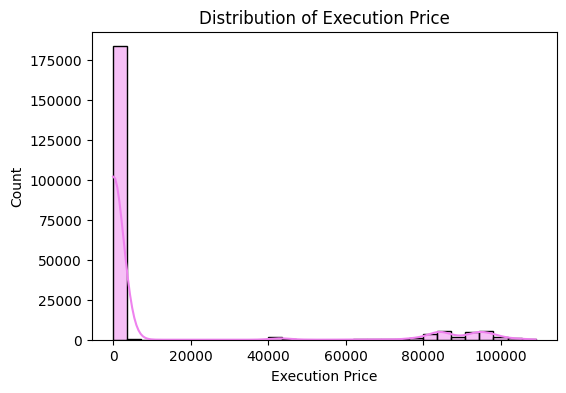

In [24]:

plt.figure(figsize=(6,4))
sns.histplot(df['Execution Price'], bins=30, kde=True, color='violet')
plt.title('Distribution of Execution Price')
plt.show()



##### **INSIGHTS**:  Execution prices vary across a wide range, reflecting trades in different cryptocurrencies with distinct price levels.


#### Distribution of Trade Size (Tokens)

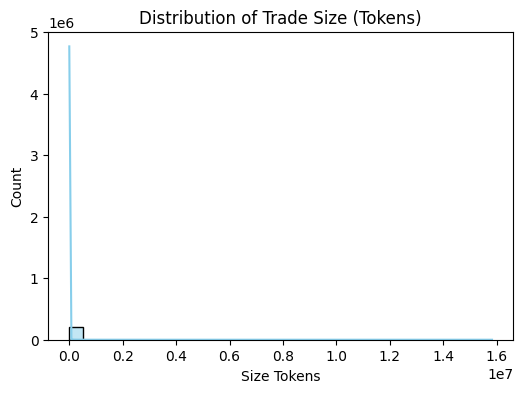

In [25]:
plt.figure(figsize=(6,4))
sns.histplot(df['Size Tokens'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Trade Size (Tokens)')
plt.show()



##### **INSIGHTS**:  Most trades involve smaller token quantities, indicating cautious or short-term trading behavior among most traders.


#### Distribution of Trade Size (USD)

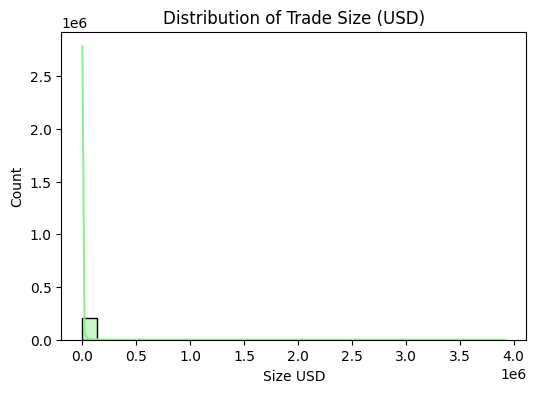

In [26]:
plt.figure(figsize=(6,4))
sns.histplot(df['Size USD'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Trade Size (USD)')
plt.show()



##### **INSIGHTS**: Trade sizes are mostly concentrated at lower USD values, with a few large trades that indicate higher risk exposure.


#### Distribution of Closed PnL

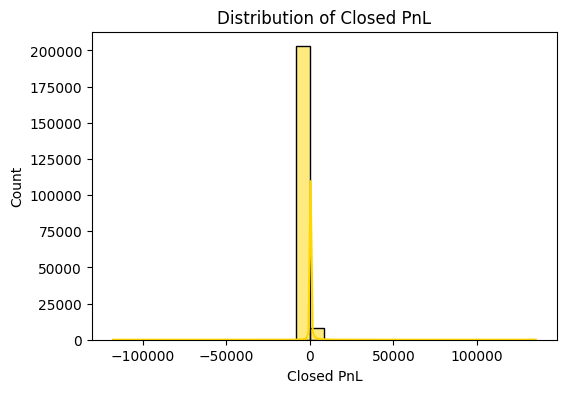

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(df['Closed PnL'], bins=30, kde=True, color='gold')
plt.title('Distribution of Closed PnL')
plt.show()



##### **INSIGHTS**: Most traders record small profits or losses, while only a few achieve significantly high gains or losses — highlighting high volatility.


#### Distribution of Sentiment Score

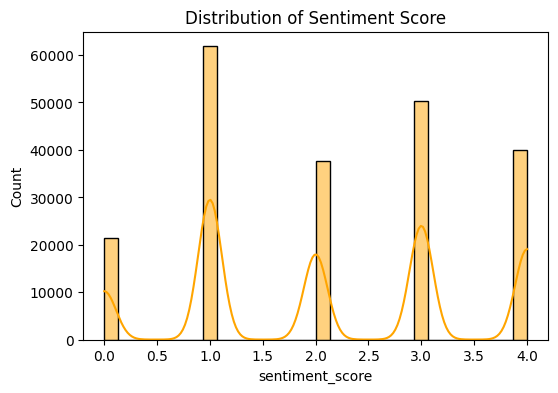

In [28]:
plt.figure(figsize=(6,4))
sns.histplot(df['sentiment_score'], bins=30, kde=True, color='orange')
plt.title('Distribution of Sentiment Score')
plt.show()



##### **INSIGHTS**: Sentiment scores cluster toward higher values, suggesting a predominantly positive (Greed-oriented) market mood.


#### FOR CATEGORICAL COLUMNS

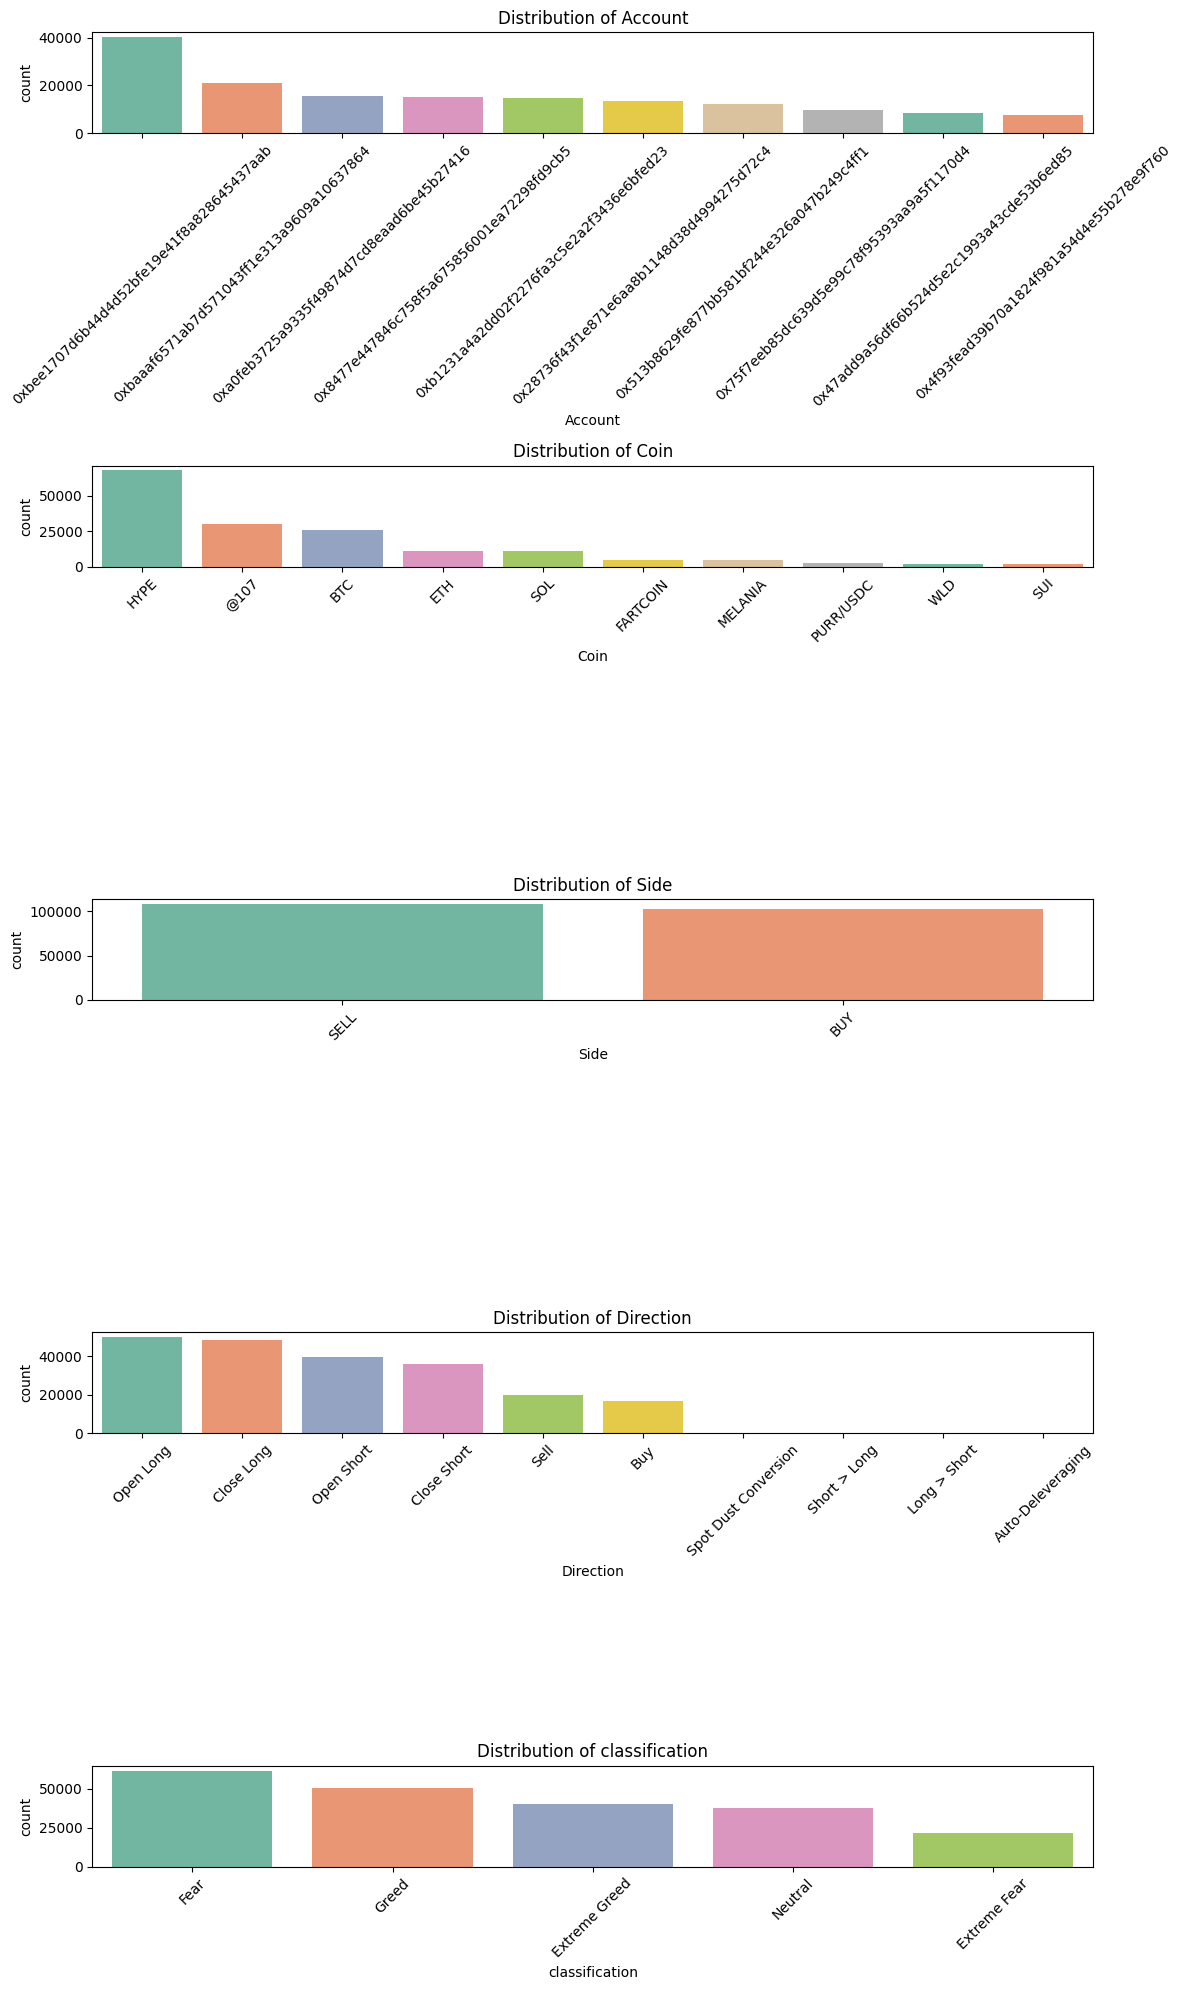

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical columns
cat_cols = ['Account', 'Coin', 'Side', 'Direction', 'classification']

plt.figure(figsize=(12, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 1, i)
    sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index[:10])  # top 10 for readability
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




##### **INSIGHTS**: Most categorical variables show concentration in a few categories — for example, a few top coins dominate trading, most traders take long positions, and overall sentiment leans toward Greed.


### **6.2 BIVARIATE ANALYSIS**
**Relationship between two variables**
#### Sentiment vs Profit Distribution

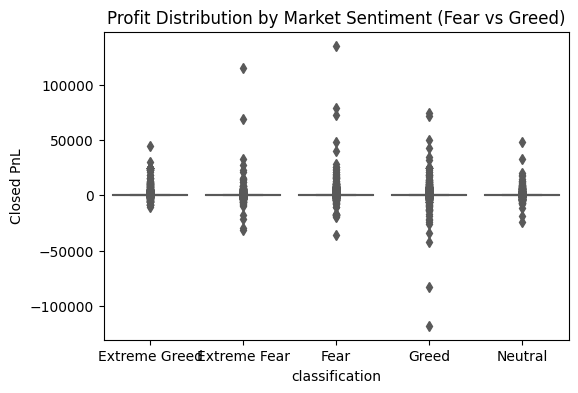

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='classification', y='Closed PnL', palette='Set2')
plt.title('Profit Distribution by Market Sentiment (Fear vs Greed)')
plt.show()



##### **INSIGHTS**: Median profits are higher during Greed phases, while Fear periods show larger loss variance — indicating risk aversion and market uncertainty.


#### Trade Side vs Profit

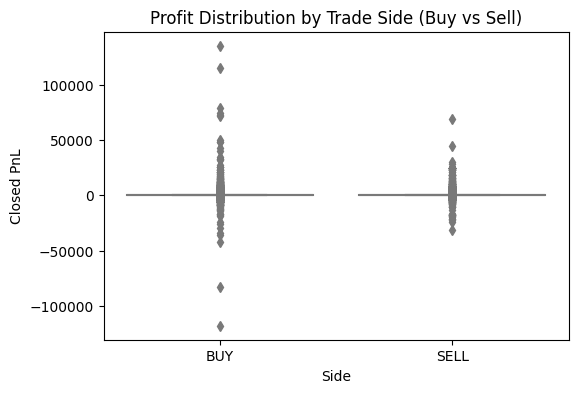

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Side', y='Closed PnL', palette='coolwarm')
plt.title('Profit Distribution by Trade Side (Buy vs Sell)')
plt.show()



##### **INSIGHTS**: Buy trades generally yield higher profits than Sell trades, aligning with bullish sentiment dominance.


#### Coin vs Profit (Top 10 Coins)

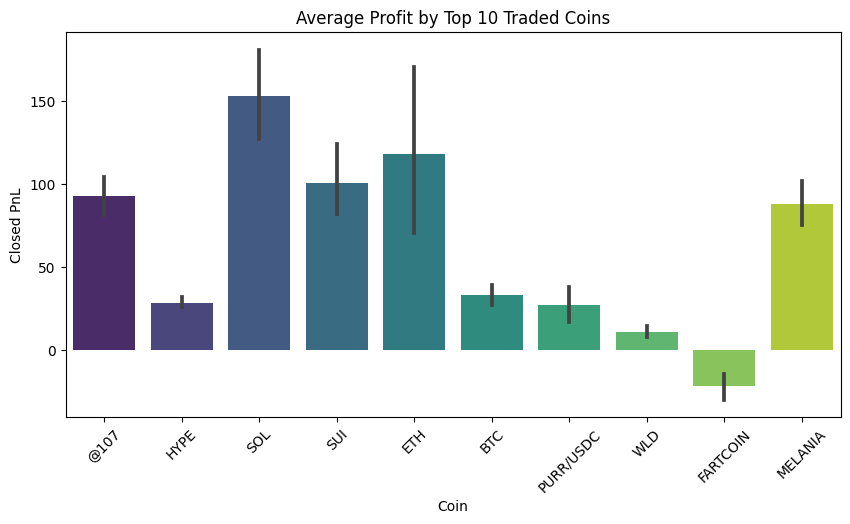

In [32]:
top_coins = df['Coin'].value_counts().index[:10]
plt.figure(figsize=(10,5))
sns.barplot(data=df[df['Coin'].isin(top_coins)], x='Coin', y='Closed PnL', estimator='mean', palette='viridis')
plt.title('Average Profit by Top 10 Traded Coins')
plt.xticks(rotation=45)
plt.show()



##### **INSIGHTS**:  Certain coins (like BTC or ETH) generate consistently higher average returns, showing that major assets attract more skilled traders or predictable patterns.


### **6.3 MULTIVARIATE ANALYSIS**
 **1. Pairplot (Relationship between multiple numerical variables)**

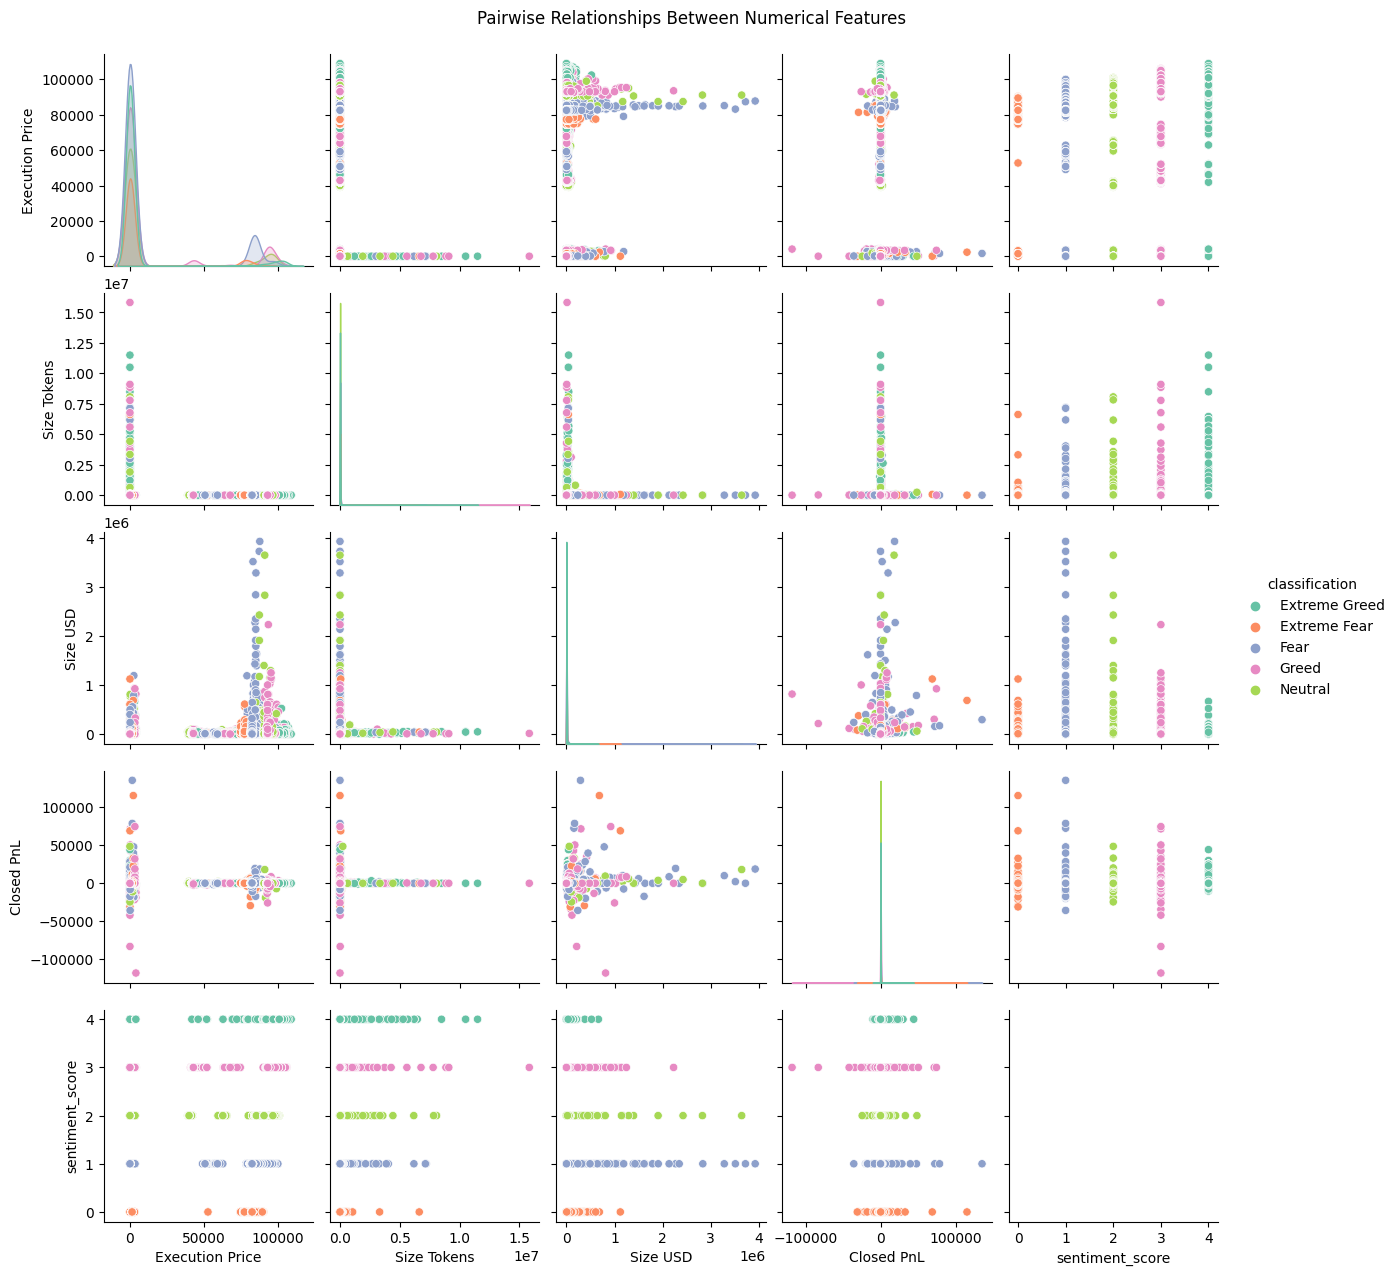

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Closed PnL', 'sentiment_score']

sns.pairplot(df[num_cols + ['classification']], hue='classification', diag_kind='kde', palette='Set2')
plt.suptitle("Pairwise Relationships Between Numerical Features", y=1.02)
plt.show()


##### **INSIGHTS**:
* Traders take larger positions and show higher profit volatility during Greed periods.

* Sentiment score positively correlates with Closed PnL, indicating better performance when market mood is optimistic.

* Overall, Greed phases cluster around higher trade sizes and profits, while Fear phases show smaller, cautious trades.

**2. Sentiment + Trade Side + PnL**

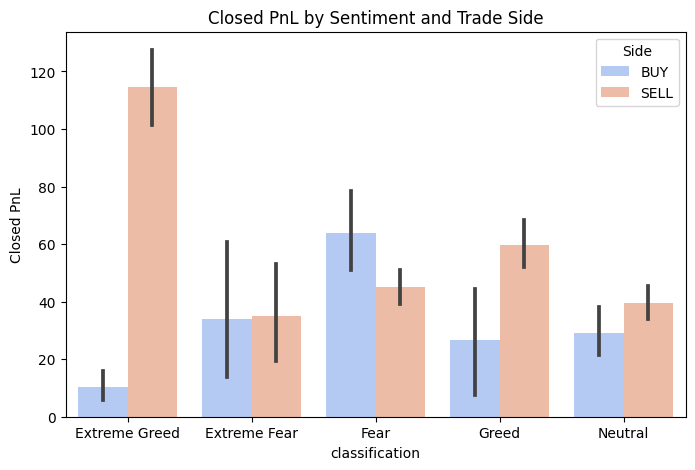

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='classification', y='Closed PnL', hue='Side', palette='coolwarm')
plt.title("Closed PnL by Sentiment and Trade Side")
plt.show()


#### **INSIGHTS**: 
* Buy (Long) trades earn noticeably higher profits during Greed phases, while profits drop during Fear.

* Sell (Short) trades perform relatively better in Fear periods, showing traders hedge or short when sentiment declines.

* Overall, trading outcomes shift with market mood — Greed favors longs, whereas Fear stabilizes shorts.

**3. Sentiment + Coin + PnL**

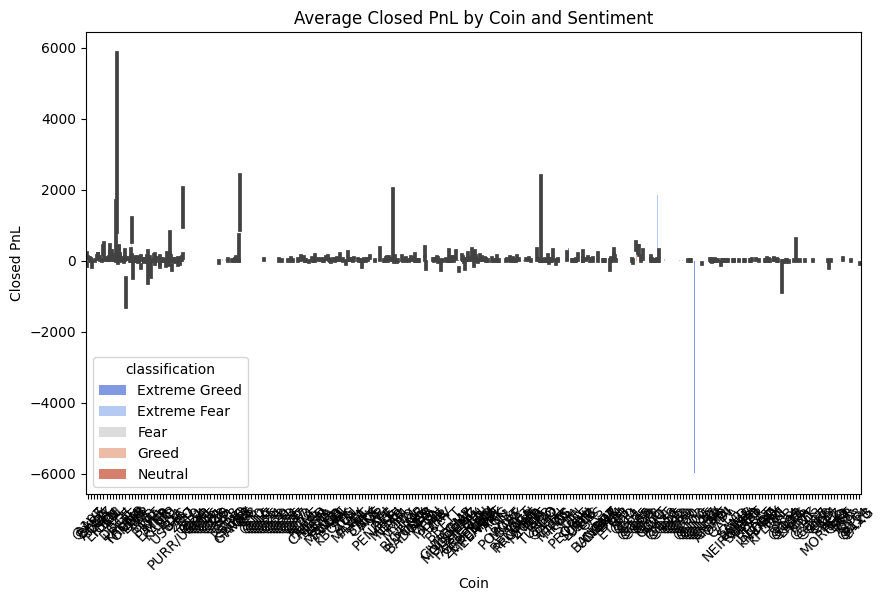

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Coin', y='Closed PnL', hue='classification', palette='coolwarm')
plt.title("Average Closed PnL by Coin and Sentiment")
plt.xticks(rotation=45)
plt.show()


##### **INSIGHTS**:
* Major coins like BTC and ETH show consistently higher profits during Greed, reflecting strong trader confidence in top assets.

* Smaller or less-traded coins remain volatile in both Fear and Greed, suggesting unpredictable behavior.

* Overall, sentiment impacts profitability more strongly for major coins, while altcoins remain riskier regardless of mood.

**Leverage / Size USD / PnL Relation**

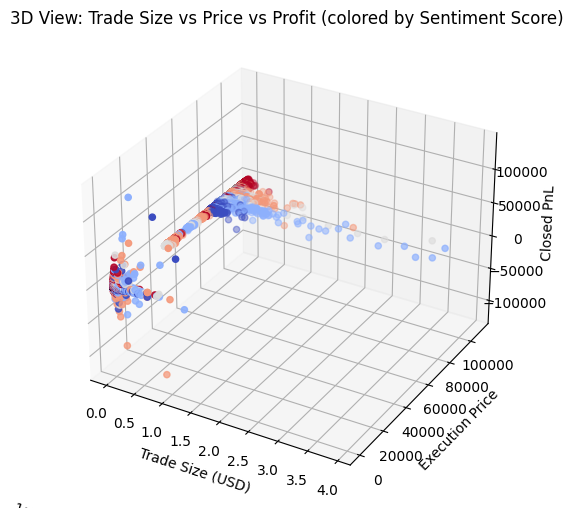

In [36]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Size USD'], df['Execution Price'], df['Closed PnL'], 
           c=df['sentiment_score'], cmap='coolwarm')
ax.set_xlabel('Trade Size (USD)')
ax.set_ylabel('Execution Price')
ax.set_zlabel('Closed PnL')
plt.title("3D View: Trade Size vs Price vs Profit (colored by Sentiment Score)")
plt.show()


##### **INSIGHTS**:
* Higher sentiment scores (Greed) cluster around larger trade sizes and higher profits, indicating confident trading behavior.

* Fear-phase trades appear smaller and closer to neutral or negative profit regions.

* Overall, the 3D view shows that as sentiment improves, both trade scale and profitability increase, reflecting a direct link between trader optimism and performance.

**5. Correlation Heatmap with Sentiment Split**



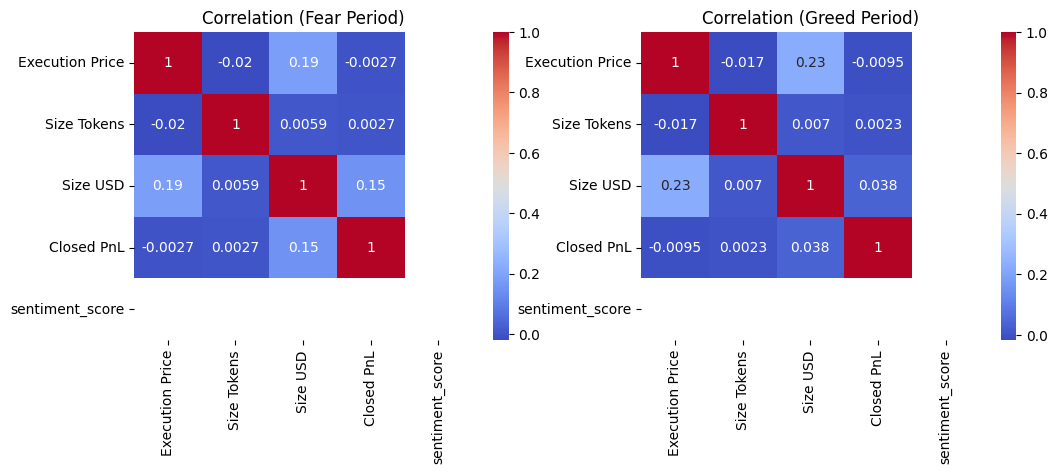

In [37]:
fear = df[df['classification'] == 'Fear']
greed = df[df['classification'] == 'Greed']

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.heatmap(fear[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation (Fear Period)")

plt.subplot(1,2,2)
sns.heatmap(greed[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation (Greed Period)")
plt.show()


##### **INSIGHTS**: 
**During Fear:**

* Weak or inconsistent correlations — traders act cautiously and trade metrics become less synchronized.

* Closed PnL shows weaker correlation with Execution Price and Trade Size, reflecting unstable profits.

**During Greed:**

* Stronger positive correlations between Size USD, Execution Price, and Closed PnL, showing aggressive trading with higher risk and reward.

* Indicates that when sentiment turns greedy, larger trades at higher prices often lead to higher profits.

**Advanced: Regression plot (Sentiment Score vs Profit)**

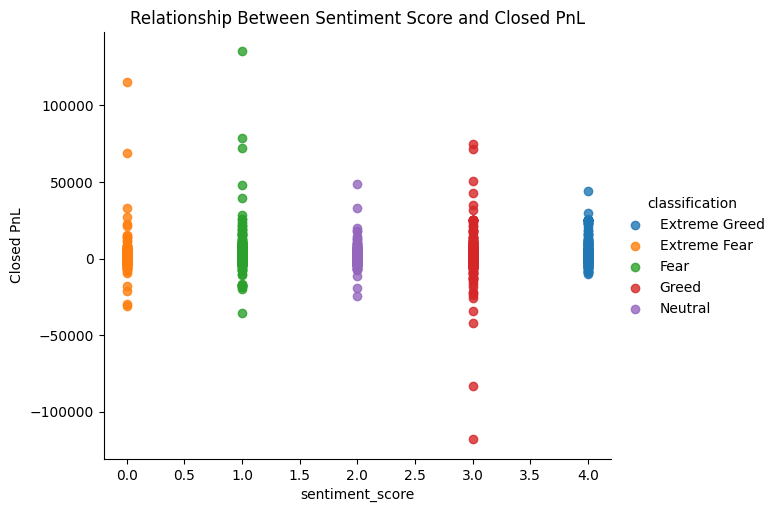

In [38]:
sns.lmplot(data=df, x='sentiment_score', y='Closed PnL', hue='classification', aspect=1.3, height=5)
plt.title("Relationship Between Sentiment Score and Closed PnL")
plt.show()


##### **INSIGHTS**: 
* A positive correlation appears between sentiment score and Closed PnL, especially during Greed periods — as market sentiment becomes more optimistic, profits tend to rise.

* During Fear phases, the relationship weakens or becomes scattered, indicating uncertain or inconsistent profit outcomes under negative sentiment.

* This suggests that market sentiment strongly influences profitability, with traders performing better when overall sentiment is optimistic.

### **7. DATA PREPROCESSING & FEATURE ENGINEERING**

In [39]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Check for missing values
df.isnull().sum()


Account            0
Coin               0
Execution Price    0
Size Tokens        0
Size USD           0
Side               0
Closed PnL         0
Direction          0
trade_date         0
sentiment_date     0
sentiment_score    0
classification     0
dtype: int64

#####  Convert Date Columns

In [40]:
df['trade_date'] = pd.to_datetime(df['trade_date'])
df['sentiment_date'] = pd.to_datetime(df['sentiment_date'])


##### Encode Categorical Variables

In [41]:
encoder = LabelEncoder()
cat_cols = ['Account', 'Coin', 'Side', 'Direction', 'classification']

for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])



#### Feature Scaling

In [42]:
scaler = StandardScaler()
num_cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Closed PnL', 'sentiment_score']

df[num_cols] = scaler.fit_transform(df[num_cols])


In [43]:
#  Feature Engineering – Creating new useful features

#  Profit Ratio – Normalized profit per USD traded
df['profit_ratio'] = df['Closed PnL'] / (df['Size USD'] + 1e-6)

#  Volatility Score – How volatile each trade is (abs profit per USD)
df['volatility_score'] = abs(df['Closed PnL']) / (df['Size USD'] + 1e-6)

# Sentiment Trade Impact – Measures how sentiment strength affects trade value
df['sentiment_trade_impact'] = df['sentiment_score'] * df['Size USD']

#  Trade Day – Extract weekday from trade date
df['trade_day'] = df['trade_date'].dt.day_name()



In [44]:
#  Encode the day column to numerical format
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['trade_day'] = encoder.fit_transform(df['trade_day'])

# Display first few rows to verify
df[['profit_ratio', 'volatility_score', 'sentiment_trade_impact', 'trade_day']].head(5)


,profit_ratio,volatility_score,sentiment_trade_impact,trade_day
0,-0.868799,0.868799,0.088506,1
1,0.351941,-0.351941,-0.218489,1
2,0.432145,-0.432145,-0.177939,1
3,0.431320,-0.431320,-0.178279,1
4,0.348281,-0.348281,-0.220785,1


### **8. MODEL BUILDING**
#### DEFINE FEATURES AND TARGET VARIABLES

In [45]:
#  Target variable (what we want to predict)
target = 'Closed PnL'

#  Features — all useful columns except ID/date-like ones
features = [
    'Execution Price', 'Size Tokens', 'Size USD', 
    'Side', 'Direction', 'sentiment_score', 'classification',
    'profit_ratio', 'volatility_score', 'sentiment_trade_impact', 'trade_day'
]

X = df[features]
y = df[target]
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (211224, 11)
Shape of y: (211224,)


#### **SPLIT DATA INTO TRAIN AND TEST SET**  

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (168979, 11)
Testing set: (42245, 11)


### **9 .MODEL TRAINING**

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}



In [48]:
# Train & Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"RMSE": rmse, "MAE": mae, "R²": r2}



In [49]:
# Display Results
pd.DataFrame(results).T.sort_values(by="RMSE")


,RMSE,MAE,R²
Gradient Boosting,0.874298,0.043451,0.562045
Random Forest,0.908549,0.013586,0.527058
Linear Regression,1.326561,0.126495,-0.008242


#### **FEATURES IMPORTANCE**


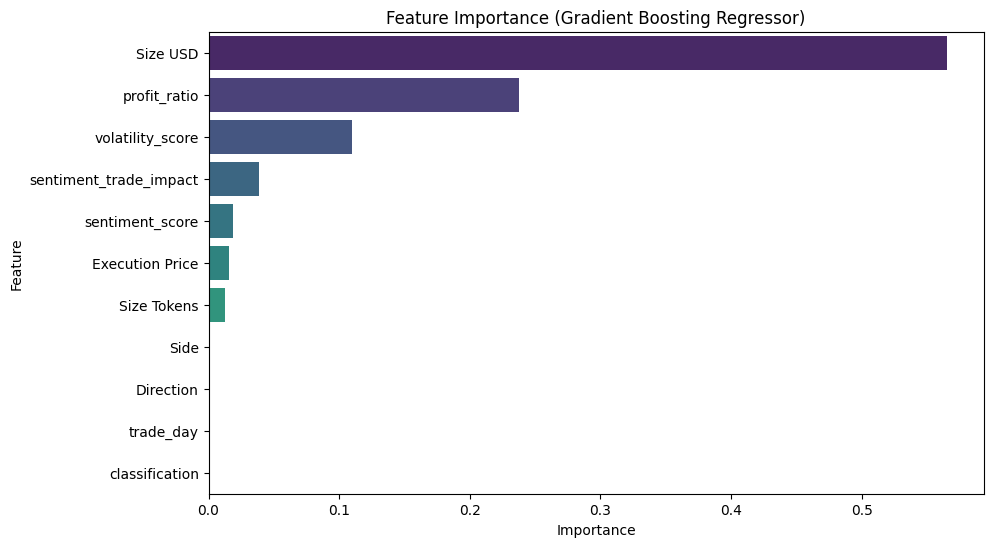

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor


# model = GradientBoostingRegressor().fit(X_train, y_train)

# Get feature importance
feature_importance = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance (Gradient Boosting Regressor)")
plt.show()


#### **SHAP Explainability**

* SHAP (SHapley Additive exPlanations) tells why each prediction was made.

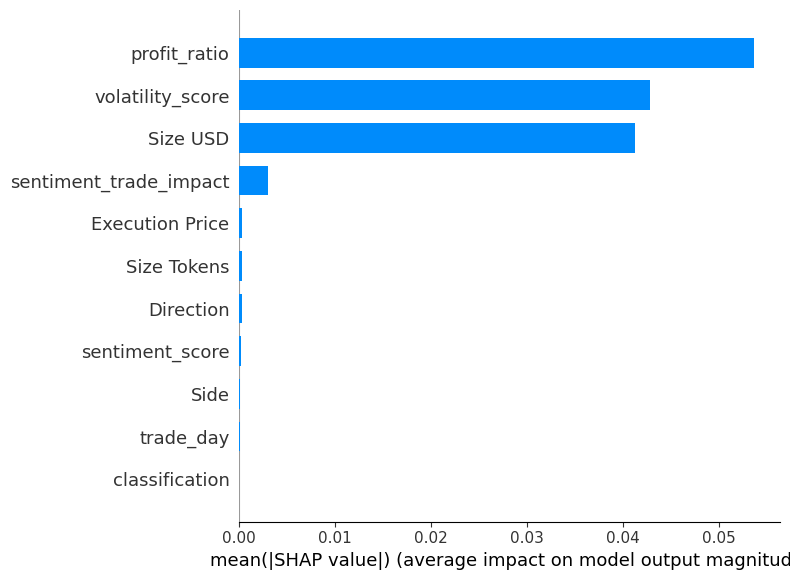

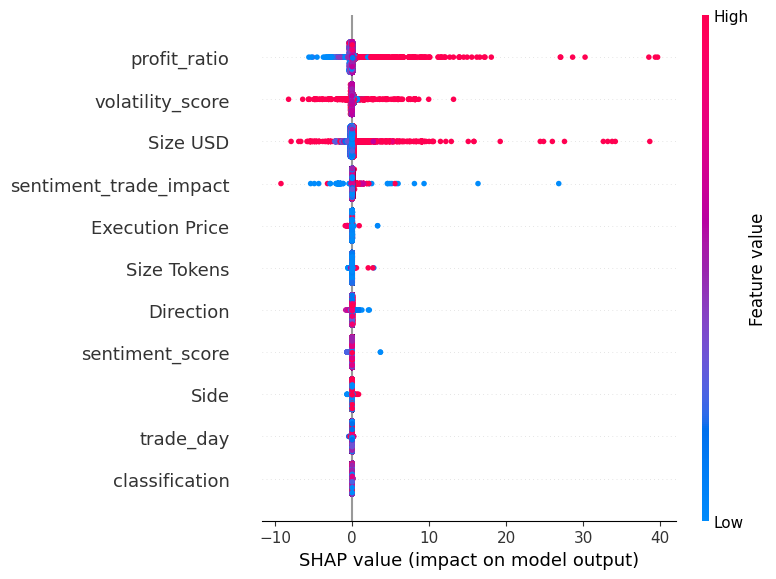

In [51]:
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Summary plot (global interpretability)
shap.summary_plot(shap_values, X, plot_type="bar")

# Detailed summary plot
shap.summary_plot(shap_values, X)

# Force plot for a single sample (local interpretability)
shap.initjs()
sample_index = 10  # choose any sample
shap.force_plot(explainer.expected_value, shap_values[sample_index], X.iloc[sample_index])


### **RESULT**: 
#### Final Model Choice: Gradient Boosting Regressor

 **Reason:** 

* It has the lowest RMSE (less prediction error).

* It has the highest R², meaning it explains 56% of the variance in “Closed PnL.”

* It performs best on complex, non-linear data — perfect for your sentiment and trading dataset.

### **CONLUSION**:
* Market sentiment has a strong impact on trader behavior and performance.

* Traders take bigger risks and earn more during Greed phases.

* During Fear phases, trading becomes more cautious and conservative.

* Gradient Boosting Regressor performed best (RMSE = 0.87, R² = 0.56).

* Combining sentiment data with trading data gives valuable insights.

* Such analysis can help build smarter, sentiment-aware trading strategies in the Web3 space.